# Exp14. 아이유팬이 좋아할만한 다른 아티스트 찾기
- 협업 필터링은 다수의 사용자의 아이템 구매 이력 정보 만으로 사용자 간의 유사성 및 아이템 간 유사성을 파악한다. 
- 콘텐츠 기반 필터링은 아이템의 고유 정보를 바탕으로 아이템 간 유사성을 파악한다.
- 즉, 협업 필터링에서는 아이템과 사용자 간의 행동 또는 관계에만 주목할 뿐 아이템 자체의 고유한 속성에 주목하지 않는다. 
- 콘텐츠 기반 필터링에서는 아이템 자체의 속성에만 주목하고 사용자와 아이템 간의 관련성에는 주목하지 않는다.  

### 데이터 준비

In [1]:
import pandas as pd
import os

fname = os.getenv('HOME') + '/aiffel/recommendata_iu/data/lastfm-dataset-360K/usersha1-artmbid-artname-plays.tsv'
col_names = ['user_id', 'artist_MBID', 'artist', 'play']  # 임의로 컬럼명 지정
data = pd.read_csv(fname, sep='\t', names=col_names)
data.head(10)

,user_id,artist_MBID,artist,play
0,00000c289a1829a808ac09c00daf10bc3c4e223b,3bd73256-3905-4f3a-97e2-8b341527f805,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,f2fb0ff0-5679-42ec-a55c-15109ce6e320,die Ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,b3ae82c2-e60b-4551-a76d-6620f1b456aa,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,3d6bbeb7-f90e-4d10-b440-e153c0d10b53,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,bbd2ffd7-17f4-4506-8572-c1ea58c3f9a8,juliette & the licks,706
5,00000c289a1829a808ac09c00daf10bc3c4e223b,8bfac288-ccc5-448d-9573-c33ea2aa5c30,red hot chili peppers,691
6,00000c289a1829a808ac09c00daf10bc3c4e223b,6531c8b1-76ea-4141-b270-eb1ac5b41375,magica,545
7,00000c289a1829a808ac09c00daf10bc3c4e223b,21f3573f-10cf-44b3-aeaa-26cccd8448b5,the black dahlia murder,507
8,00000c289a1829a808ac09c00daf10bc3c4e223b,c5db90c4-580d-4f33-b364-fbaa5a3a58b5,the murmurs,424
9,00000c289a1829a808ac09c00daf10bc3c4e223b,0639533a-0402-40ba-b6e0-18b067198b73,lunachicks,403


In [2]:
# artist_MBID 항목은 우리의 관심사가 아니므로 사용하는 컬럼만 남기고 제거
using_cols = ['user_id', 'artist', 'play']
data = data[using_cols]
data.head(10)

,user_id,artist,play
0,00000c289a1829a808ac09c00daf10bc3c4e223b,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,die Ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,juliette & the licks,706
5,00000c289a1829a808ac09c00daf10bc3c4e223b,red hot chili peppers,691
6,00000c289a1829a808ac09c00daf10bc3c4e223b,magica,545
7,00000c289a1829a808ac09c00daf10bc3c4e223b,the black dahlia murder,507
8,00000c289a1829a808ac09c00daf10bc3c4e223b,the murmurs,424
9,00000c289a1829a808ac09c00daf10bc3c4e223b,lunachicks,403


In [3]:
# 검색을 쉽게 하기 위해 아티스트 문자열을 소문자로 변환
data['artist'] = data['artist'].str.lower()
data.head(10)

,user_id,artist,play
0,00000c289a1829a808ac09c00daf10bc3c4e223b,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,die ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,juliette & the licks,706
5,00000c289a1829a808ac09c00daf10bc3c4e223b,red hot chili peppers,691
6,00000c289a1829a808ac09c00daf10bc3c4e223b,magica,545
7,00000c289a1829a808ac09c00daf10bc3c4e223b,the black dahlia murder,507
8,00000c289a1829a808ac09c00daf10bc3c4e223b,the murmurs,424
9,00000c289a1829a808ac09c00daf10bc3c4e223b,lunachicks,403


In [4]:
# 첫 번째 유저가 어떤 아티스트의 노래를 듣는지 확인해보자. 
condition = (data['user_id'] == data.loc[0, 'user_id'])
data.loc[condition]

,user_id,artist,play
0,00000c289a1829a808ac09c00daf10bc3c4e223b,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,die ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,juliette & the licks,706
5,00000c289a1829a808ac09c00daf10bc3c4e223b,red hot chili peppers,691
6,00000c289a1829a808ac09c00daf10bc3c4e223b,magica,545
7,00000c289a1829a808ac09c00daf10bc3c4e223b,the black dahlia murder,507
8,00000c289a1829a808ac09c00daf10bc3c4e223b,the murmurs,424
9,00000c289a1829a808ac09c00daf10bc3c4e223b,lunachicks,403


- 처음 보는 아티스트가 많다. 추천 시스템에서는 분야에 대한 지식이 특히 필요한데, 그 이유는 모르면 검증을 못하기 때문이라고 한다.  

### 데이터 탐색
- 유저 수, 아티스트 수, 인기 많은 아티스트
- 유저들이 몇 명의 아티스트를 듣고 있는지에 대한 통계
- 유저 play 횟수 중앙값에 대한 통계
- `pandas.DataFrame.nunique()`는 특정 컬럼에 포함된 유니크한 데이터의 개수를 알아보는데 유용하다. 

In [5]:
# 유저 수
data['user_id'].nunique()

358868

In [6]:
# 아티스트 수
data['artist'].nunique()

291346

In [7]:
# 인기 많은 아티스트
artist_count = data.groupby('artist')['user_id'].count()
artist_count.sort_values(ascending=False).head(30)

artist
radiohead                77254
the beatles              76245
coldplay                 66658
red hot chili peppers    48924
muse                     46954
metallica                45233
pink floyd               44443
the killers              41229
linkin park              39773
nirvana                  39479
system of a down         37267
queen                    34174
u2                       33206
daft punk                33001
the cure                 32624
led zeppelin             32295
placebo                  32072
depeche mode             31916
david bowie              31862
bob dylan                31799
death cab for cutie      31482
arctic monkeys           30348
foo fighters             30144
air                      29795
the rolling stones       29754
nine inch nails          28946
sigur rós                28901
green day                28732
massive attack           28691
moby                     28232
Name: user_id, dtype: int64

In [8]:
# 유저별 몇 명의 아티스트를 듣고 있는지에 대한 통계
user_count = data.groupby('user_id')['artist'].count()
user_count.describe()

count    358868.000000
mean         48.863234
std           8.524272
min           1.000000
25%          46.000000
50%          49.000000
75%          51.000000
max         166.000000
Name: artist, dtype: float64

In [9]:
# 유저별 play 횟수 중앙값에 대한 통계
user_median = data.groupby('user_id')['play'].median()
user_median.describe()

count    358868.000000
mean        142.187676
std         213.089902
min           1.000000
25%          32.000000
50%          83.000000
75%         180.000000
max       50142.000000
Name: play, dtype: float64

### 모델 검증을 위한 사용자 초기 정보 세팅
- 본인의 음악 취향과 가장 유사한 아티스트를 추천받고 싶을 때, 유튜브 뮤직 등의 추천 시스템들은 이를 위해서 처음 가입하는 사용자의 취향과 유사한 아티스트 정보를 5개 이상 입력받는 과정을 거치게하는 경우가 많다. 
- 우리도 동일한 과정이 필요하므로, 우리가 만든 추천 시스템의 추후 검증 과정을 위해 유명한 아티스트들을 기존의 데이터에 추가해서 넣자. 

In [10]:
my_favorite = ['black eyed peas' , 'maroon5' ,'jason mraz' ,'coldplay' ,'beyoncé']

# 'zimin'이라는 user_id 가 위 아티스트의 노래를 30번씩 들었다고 가정
my_playlist = pd.DataFrame({'user_id':['zimin']*5, 'artist':my_favorite, 'play':[30]*5})

if not data.isin({'user_id':['zimin']})['user_id'].any():  # user_id에 'zimin'이라는 데이터가 없다면 위에 임의로 만든 데이터 추가
    data = data.append(my_playlist)
    
data.tail(10)  # 잘 추가되었는지 확인

,user_id,artist,play
17535650,"sep 20, 2008",turbostaat,12
17535651,"sep 20, 2008",cuba missouri,11
17535652,"sep 20, 2008",little man tate,11
17535653,"sep 20, 2008",sigur rós,10
17535654,"sep 20, 2008",the smiths,10
0,zimin,black eyed peas,30
1,zimin,maroon5,30
2,zimin,jason mraz,30
3,zimin,coldplay,30
4,zimin,beyoncé,30


### 모델에 활용하기 위한 전처리 (실습)
- indexing : 데이터의 쉬운 관리를 위해 번호를 붙여준다. 
- `pandas.DataFrame.unique()`는 특정 컬럼에 포함된 유니크한 데이터만 모아준다. indexing 작업에 유용하다. 

In [11]:
# 고유한 유저, 아티스트를 찾아내는 코드
user_unique = data['user_id'].unique()
artist_unique = data['artist'].unique()

# 유저, 아티스트 indexing하는 코드
user_to_idx = {v:k for k, v in enumerate(user_unique)}
artist_to_idx = {v:k for k, v in enumerate(artist_unique)}

In [12]:
# 인덱싱이 잘 되었는지 확인
print(user_to_idx['zimin'])  # 358869명의 유저 중 마지막으로 추가된 유저라서 358868이 나와야 한다. 
print(artist_to_idx['black eyed peas'])

358868
376


In [13]:
# indexing을 통해 데이터 컬럼 내 값을 바꾸는 코드
# dictionary 자료형의 get 함수는 https://wikidocs.net/16 참고

# user_to_idx.get을 통해 user_id 컬럼의 모든 값을 인덱싱한 Series를 구해보자. 
# 혹시 정상적으로 인덱싱되지 않은 row가 있다면 인덱스가 NaN이 될테니 dropna()로 제거
temp_user_data = data['user_id'].map(user_to_idx.get).dropna()
if len(temp_user_data) == len(data):  # 모든 row가 정상적으로 인덱싱되었다면
    print('user_id column indexing OK!!')
    data['user_id'] = temp_user_data
else:
    print('user_id column indexing Fail!!')
    
# artist_to_idx를 통해 artist 컬럼도 동일한 방식으로 인덱싱
temp_artist_data = data['artist'].map(artist_to_idx.get).dropna()
if len(temp_artist_data) == len(data):
    print('artist column indexing OK!!')
    data['artist'] = temp_artist_data
else:
    print('artist column indexing Fail!!')

data

user_id column indexing OK!!
artist column indexing OK!!


,user_id,artist,play
0,0,0,2137
1,0,1,1099
2,0,2,897
3,0,3,717
4,0,4,706
...,...,...,...
0,358868,376,30
1,358868,270115,30
2,358868,3746,30
3,358868,62,30


## 사용자의 명시적/암묵적 평가
추천 시스템은 사용자들이 아이템을 얼마나 선호하는지를 모델링하기를 원한다. 따라서 사용자의 아이템 선호도를 말해주는 유저 행동 데이터셋이 필요하다. 만약 데이터가 좋아요나 별점처럼 선호도를 명시적(explicit)으로 나타내는 것이라면 좋겠지만, 지금 우리가 가진 데이터는 사용자가 아티스트의 곡을 몇 번 플레이했는지에 대한 것이다. 이렇게 서비스를 사용하면서 자연스럽게 발생하는 암묵적(implicit)인 피드백도 사용자의 아이템에 대한 평가를 알 수 있는 단서가 될 수 있다.  
[Collaborative Filtering for Implicit Feedback Datasets](http://yifanhu.net/PUB/cf.pdf) 논문에서는 암묵적 피드백 데이터셋의 특징을 다음과 같이 정리한다. 
- 부정적인 피드백이 없다. 
- 애초에 잡음이 많다. 
- 수치는 신뢰도를 의미한다. 
- Implicit-feedback Recommender System의 평가는 적절한 방법을 고민해보아야 한다. 

In [14]:
# 1회만 play한 데이터의 비율을 보는 코드
only_one = data[data['play'] < 2]
one, all_data = len(only_one), len(data)
print(f'{one},{all_data}')
print(f'Ratio of only_one over all data is {one/all_data:.2%}')

147740,17535660
Ratio of only_one over all data is 0.84%


우리가 앞으로 만들어갈 모델에서는 암묵적 데이터의 해석을 위해 다음과 같은 규칙을 적용하자. 
1. 한 번이라도 들었으면 선호한다고 판단한다. 
2. 많이 재생한 아티스트에 대해 가중치를 주어서 더 확실히 좋아한다고 판단한다. 

## Matrix Factorization (MF)
- 데이터가 준비되었으므로 이제 모델을 만들어보자.  
- 우리는 m명의 사용자들이 n명의 아티스트에 대해 평가한 데이터를 포함한 (m, n) 사이즈의 평가 행렬(Rating Matrix)를 만들 것이다. 앞에서 살펴본 추천 시스템의 '협업 필터링'이란 결국 이런 평가 행렬을 전제로 하는 것이다. 행렬의 비어 있는 부분을 포함한 완벽한 정보를 얻을 수 있다면 완벽한 추천이 가능하다.  


- 추천 시스템의 다양한 모델 중 `Matrix Factorization (MF, 행렬 분해)` 모델을 사용하자. MF 모델은 2006년 넷플릭스의 백만 달러의 상금을 걸고 개최한 자사 추천 시스템의 성능을 10% 이상 향상시키는 챌린지를 계기로 알려지게 되었다. (오...)  
- 기본 아이디어는 (m, n) 사이즈의 행렬 R을 (m, k) 사이즈의 행렬 P와 (k, n) 사이즈의 행렬 Q로 분해한다면 R이란 그저 P와 Q의 행렬곱으로 표현 가능하다는 것이다. 대체로 k는 m이나 n보다는 훨씬 작은 값이기에 계산량 측면으로도 훨씬 유리해진다. 아이디어는 단순하지만 MF 모델은 성능이 준수하고 확장성이 좋아서 많이 사용되는 모델이다.  
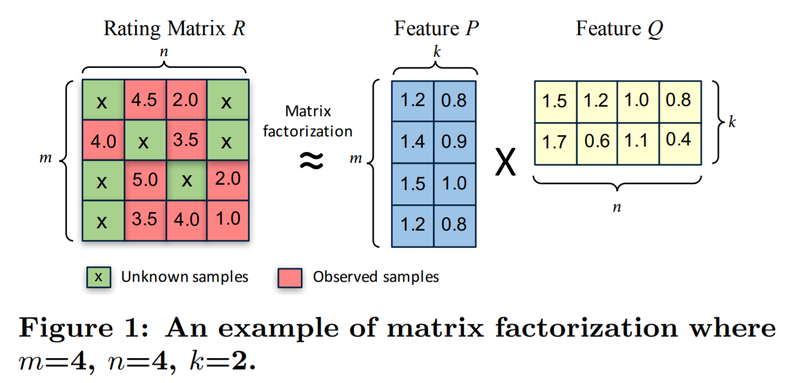  
CuMF_SGD: Fast and Scalable Matrix Factorization(https://arxiv.org/pdf/1610.05838.pdf)

- 위에서 MF 모델은 큰 평가 행렬 R을 두 개의 Feature Matrix P와 Q로 분해한다고 했다.  
- 무엇의 Feature일까? (m, k) 사이즈의 Feature Matrix P는 k 차원의 벡터를 사용자 수만큼 모아놓은 행렬이다. 즉, 아래 그림에서 첫 번째 벡터는 바로 빨간 모자를 쓴 첫 번째 사용자의 특성 벡터가 된다.  
- 같은 방식으로 Q 행렬의 첫 번째 벡터는 해리포터 영화의 특성 벡터가 된다. MF 모델은 이 두 벡터를 내적해서 얻어지는 0.88이 사용자의 영화 선호도로 보는 모델이다.   
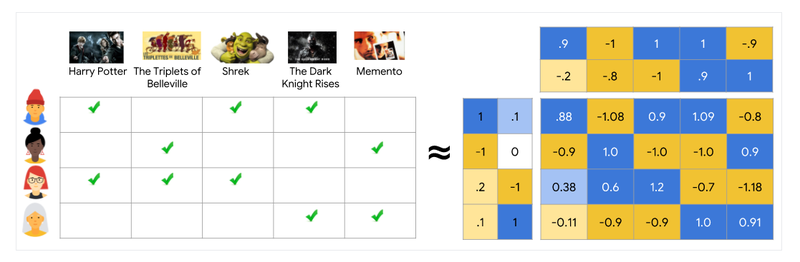  
https://developers.google.com/machine-learning/recommendation/collaborative/matrix

- 모델의 목표는 모든 유저와 아이템에 대해 k-차원의 벡터를 잘 만드는 것이다.  
- 벡터를 잘 만드는 기준은 유저 i의 벡터와 아이템 j의 벡터를 내적했을 때 유저 i가 아이템 j에 대해 평가한 수치가 비슷한지이다. 

## CSR (Compressed Sparse Row) Matrix
- 유저 X 아이템 평가 행렬의 경우 유저가 36만 명이고 아티스트는 29만 명이기에 이를 행렬로 표현하고 각 원소의 정수 한 개가 들어간다면 대략 97GB가 필요하다.  
- 평가 행렬의 용량이 이리 커진 이유는 유저가 들어보지 않은 아티스트에 대한 정보까지 모두 행렬에 포함되어 계산되기 때문이다. 따라서 평가행렬 내의 대부분의 공간은 0으로 채워지는데, 이런 행렬을 Sparse Matrix라고 한다. 이런 메모리 낭비를 최소화하기 위해서는 유저가 들어본 아티스트에 대해서만 정보를 저장하면서 전체 행렬 형태를 유추할 수 있는 데이터 구조가 필요하다. 
- CSR Matrix는 Sparse한 matrix에서 0이 아닌 유효한 데이터로 채워지는 데이터의 값과 좌표 정보만으로 구성해 메모리 사용량을 최소화하면서도 Sparse한 matrix와 동일한 행렬을 표현할 수 있도록 하는 데이터 구조다. CSR Matrix는 data, indices, indptr로 행렬을 압축해 표현한다.  
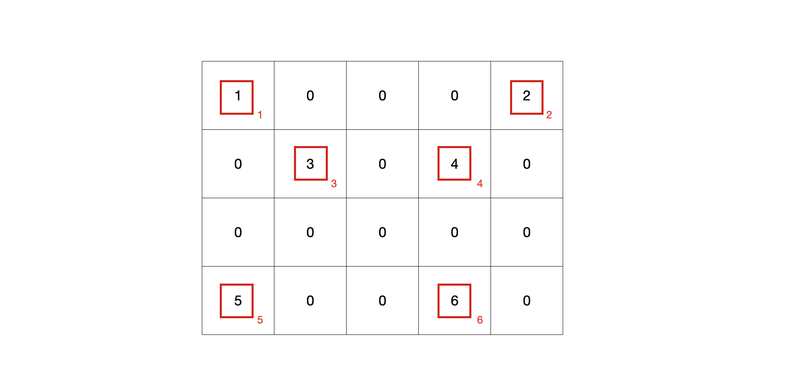

- data는 0이 아닌 원소를 차례로 기입한 값이다. 
> data = \[1, 2, 3, 4, 5, 6\]  

- indices는 data의 각 요소가 어느 열에 있는지를 표현한 index
> indices = \[0, 4, 1, 3, 0, 3\]  

- indptr은 각 행에서 0이 아닌 첫 번째 원소가 data 리스트에서 몇 번째에 해당하는지와 마지막에 data 벡터의 길이를 추가한 것이다. 다만 예시의 3번째 행처럼 0이 아닌 원소가 없는 경우에는 그 다음 행의 값과 같은 값을 넣었다. 
> indptr = \[0, 2, 4, 4, 6]\  

- **이를 통해 data\[0:2\]는 첫 번째 행, data\[2:4\]는 두 번째 행, data\[4:4\]는 세 번째 행, data\[4:6\]은 네 번째 행에 위치함을 나타낼 수 있다.** (오...)
- 이제 우리의 data를 CSR Matrix에 맞게 바꿔보자. 
- DataFrame을 만드는 방식이 다양하듯 csr_matrix를 [만드는 방법](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html)도 다양하다. 
- 현재 data와 같은 데이터 구조에 적합한 방식은 위 링크에서 4번째로 설명하고 있는 방법이다. 

In [15]:
from scipy.sparse import csr_matrix

num_user = data['user_id'].nunique()
num_artist = data['artist'].nunique()

csr_data = csr_matrix((data.play, (data.user_id, data.artist)), shape=(num_user, num_artist))
csr_data

<358869x291347 sparse matrix of type '<class 'numpy.int64'>'
	with 17535578 stored elements in Compressed Sparse Row format>

## MF 모델 학습하기
- `implicit` 패키지는 암묵적 데이터셋을 사용하는 다양한 모델을 굉장히 빠르게 학습할 수 있는 패키지다. 
- 이 패키지에 구현된 `als(AlternatingLeastSquares)` 모델을 사용해보자. MF에서 쪼개진 두 Feature Matrix를 한꺼번에 훈련하는 것은 잘 수렴하지 않기 때문에, 한 쪽을 고정시키고 다른 쪽을 학습하는 방식을 번갈아 수행하는 als방식이 효과적인 것으로 알려져 있다. 

In [16]:
from implicit.als import AlternatingLeastSquares
import os
import numpy as np

# implicit 라이브러리에서 권장하고 있는 부분으로, 학습 내용과는 무관
os.environ['OPENBLAS_NUM_THREADS']='1'
os.environ['KMP_DUPLICATE_LIB_OK']='True'
os.environ['MKL_NUM_THREADS']='1'

- AlternatingLeastSquares 클래스의 __init__ 파라미터를 살펴보자. 
1. factors : 유저와 아이템의 벡터를 몇 차원으로 할 것인지
2. regularization : 과적합을 방지하기 위해 정규화 값을 얼마나 사용할 것인지
3. use_gpu : GPU를 사용할 것인지
4. iterations : epochs와 같은 의미다. 데이터를 몇 번 반복해서 학습할 것인지  

- 1과 4를 늘릴수록 학습 데이터를 잘 학습하게 되지만 과적합의 우려가 있으니 좋은 값을 찾아야 한다. 

In [17]:
# Implicit AlternatingLeastSquares 모델의 선언
als_model = AlternatingLeastSquares(factors=100, regularization=0.01, use_gpu=False, iterations=15, dtype=np.float32)

In [18]:
# als 모델은 input으로 (item X user 꼴의 matrix를 받기 때문에 Transpose)
csr_data_transpose = csr_data.T
csr_data_transpose

<291347x358869 sparse matrix of type '<class 'numpy.int64'>'
	with 17535578 stored elements in Compressed Sparse Column format>

In [19]:
# 모델 훈련
als_model.fit(csr_data_transpose)

  0%|          | 0/15 [00:00<?, ?it/s]

- 모델 학습이 끝났으므로 2가지 사항을 살펴보자. 
1. zimin 벡터와 black eyed peas의 벡터를 어떻게 만들고 있는지
2. 두 벡터를 곱하면 어떤 값이 나오는지

In [20]:
zimin, black_eyed_peas = user_to_idx['zimin'], artist_to_idx['black eyed peas']
zimin_vector, black_eyed_peas_vector = als_model.user_factors[zimin], als_model.item_factors[black_eyed_peas]

In [21]:
zimin_vector

array([ 0.15848309,  0.5058977 , -1.6207781 , -1.0437993 , -0.21345429,
       -0.08507309, -1.0440984 ,  0.5054515 , -0.7056729 ,  0.32353976,
       -0.5127795 , -0.3940304 , -0.17385985,  0.5351164 ,  0.58443266,
       -0.2760252 , -0.76121765, -1.3606381 , -0.74052596,  0.69891995,
       -0.6765855 , -0.29353067, -0.98643726,  0.80591893, -0.4843389 ,
       -0.4987103 ,  0.1744863 ,  0.75095767, -0.48702127, -0.5818023 ,
       -0.13608123,  1.165323  ,  0.22650012, -1.1401786 , -0.08674902,
       -0.6891265 , -0.4480574 , -0.24656162,  0.73956716, -0.3763274 ,
        1.0389711 , -0.29466367,  0.43561992,  0.6709945 , -0.339744  ,
        0.4330601 ,  0.57976675,  0.00192278, -0.31123707, -0.3699751 ,
        1.1941056 , -0.13285697,  1.0907296 ,  0.68218714,  1.5616703 ,
        0.04729603, -0.8086487 , -0.49231207, -0.39013574,  0.8548808 ,
        0.10914571,  0.3911771 , -0.7428236 , -0.22584717,  0.50112283,
        0.12942556,  1.5133287 , -0.12609433,  0.10199018, -0.46

In [22]:
black_eyed_peas_vector

array([ 0.00440047,  0.00244002, -0.00603206, -0.00582994,  0.02034032,
        0.00063497, -0.01107611,  0.01799385, -0.00329159,  0.01306294,
        0.00951131, -0.00543918,  0.00723341,  0.01660234,  0.03130219,
        0.01061414,  0.00820761, -0.0145884 , -0.00072509,  0.016472  ,
        0.00914459,  0.00548749,  0.00281815,  0.00114832,  0.00137519,
       -0.01099352, -0.00696724,  0.01192064,  0.00180605,  0.00551516,
        0.00219936,  0.01720916,  0.00223289,  0.0031119 ,  0.00327866,
       -0.00250861,  0.00208266, -0.00790883,  0.01188433,  0.00093316,
        0.03677807,  0.00948773,  0.02523129,  0.02252294,  0.00406332,
        0.0076232 , -0.00614383,  0.01262876,  0.02086177,  0.00224035,
        0.02504365, -0.0009771 ,  0.01588424,  0.00475047,  0.02511011,
       -0.00794501, -0.01179527, -0.00094691,  0.00489969,  0.01044506,
       -0.0017716 ,  0.01738023,  0.00850175, -0.00646116,  0.0206837 ,
        0.00553447,  0.01176736, -0.00017664,  0.01031372, -0.00

In [23]:
# zimin과 black_eyed_peas를 내적하는 코드
np.dot(zimin_vector, black_eyed_peas_vector)

0.506677

- 1이 나와야 할 것 같은데 한참 낮은 수치가 나왔다. factors를 늘리거나 iterations를 늘려야 할 것 같다.
- 이 두 수치를 늘려 1에 가깝게 나왔다하더라도 이 모델이 잘 학습되었다고는 확신할 수 없다. 
- 학습 데이터에 대해서 fitting은 되었지만 아직 보지 못한 데이터에 대한 검증이 이루어지지 않았기 때문이다. 

In [24]:
queen = artist_to_idx['queen']
queen_vector = als_model.item_factors[queen]
np.dot(zimin_vector, queen_vector)

0.29392624

- 그렇다면 queen에 대한 예측을 어떻게 해석해야 할까? 사용자와 아티스트 벡터 내적이 0.5를 기준으로 그보다 높으면 모델이 선호한다고 판단했다고 할 수 있을까?
- 모델은 만드는 사람이 정하기 나름이다. 객관적인 지표를 만들어 기준을 정할 수도, 도메인 경험을 통해 정할 수도 있다. 
- 추천 시스템은 다른 머신러닝 task보다 객관적인 평가가 어려운 분야다. (사람을 도통 알 수 없기 때문에...) 

## 비슷한 아티스트 찾기 + 유저에게 추천하기
### 비슷한 아티스트 찾기
- `AlternatingLeastSquares` 클래스에 구현되어 있는 `similar_items` 메서드를 통해 비슷한 아티스트를 찾는다. 

In [25]:
favorite_artist = 'coldplay'
artist_id = artist_to_idx[favorite_artist]
similar_artist = als_model.similar_items(artist_id, N=15)
similar_artist

[(62, 1.0000001),
 (277, 0.9862426),
 (28, 0.980948),
 (5, 0.97639334),
 (217, 0.9759504),
 (247, 0.974663),
 (473, 0.9669954),
 (418, 0.9627378),
 (910, 0.95594007),
 (490, 0.9547454),
 (268, 0.95322126),
 (1018, 0.9520108),
 (694, 0.947783),
 (782, 0.9466224),
 (75, 0.9378508)]

- (아티스트의 id, 유사도)를 튜플로 반환하고 있다. 이를 다시 아티스트의 이름으로 매핑하자. 

In [26]:
#artist_to_idx 를 뒤집어, index로부터 artist 이름을 얻는 dict를 생성
idx_to_artist = {v:k for k,v in artist_to_idx.items()}
[idx_to_artist[i[0]] for i in similar_artist]

['coldplay',
 'muse',
 'the killers',
 'red hot chili peppers',
 'radiohead',
 'the beatles',
 'placebo',
 'u2',
 'nirvana',
 'oasis',
 'pink floyd',
 'the smashing pumpkins',
 'foo fighters',
 'the white stripes',
 'queen']

In [27]:
# 몇 번 더 반복해서 확인하기 위해 위의 코드 함수화
def get_similar_artist(artist_name: str):
    artist_id = artist_to_idx[artist_name]
    similar_artist = als_model.similar_items(artist_id)
    similar_artist = [idx_to_artist[i[0]] for i in similar_artist]
    return similar_artist

In [28]:
get_similar_artist('2pac')

['2pac',
 'notorious b.i.g.',
 'nas',
 'the game',
 'dr. dre',
 'jay-z',
 'ludacris',
 '50 cent',
 'ice cube',
 'snoop dogg']

- 힙합의 경우 마니아들이 많아서 더 잘 추천되는 것으로 생각된다. 
- 마니아들은 특정 장르의 아티스트들에게로 선호도가 집중되고, 다른 장르의 아티스트들과는 선호도가 낮게 나타날 것이다. 
- 이런 마니아들의 존재로 인해 같은 장르의 아티스트들의 벡터들도더 가까워져서 get_similar_artist시 장르별 특성이 두드러질 것이다. 

In [29]:
get_similar_artist('lady gaga')

['lady gaga',
 'rihanna',
 'britney spears',
 'katy perry',
 'beyoncé',
 'the pussycat dolls',
 'christina aguilera',
 'leona lewis',
 'kelly clarkson',
 'pink']

### 유저에게 아티스트 추천하기
- 마찬가지로 `AlternatingLeastSquares` 클래스에 구현되어 있는 `recommend` 메서드를 통해 좋아할만한 아티스트를 추천받는다. 
- `filter_already_liked_items`는 유저가 이미 평가한 아이템은 제외하는 Argument다. 

In [30]:
user = user_to_idx['zimin']
# recommend에서는 user*item CSR Matrix를 받습니다.
artist_recommended = als_model.recommend(user, csr_data, N=20, filter_already_liked_items=True)
artist_recommended

[(350, 0.4569914),
 (369, 0.4418969),
 (1800, 0.43611917),
 (550, 0.4268216),
 (2249, 0.41540673),
 (354, 0.39241087),
 (901, 0.39120707),
 (2902, 0.3895063),
 (627, 0.38901156),
 (274, 0.3806328),
 (355, 0.37291577),
 (391, 0.36846235),
 (564, 0.3673995),
 (637, 0.36545146),
 (618, 0.3642053),
 (5555, 0.3599524),
 (621, 0.3580289),
 (409, 0.3557397),
 (434, 0.35441896),
 (611, 0.34775156)]

In [31]:
[idx_to_artist[i[0]] for i in artist_recommended]

['rihanna',
 'justin timberlake',
 'lady gaga',
 'britney spears',
 'katy perry',
 'nelly furtado',
 'pink',
 'james blunt',
 'maroon 5',
 'michael jackson',
 'madonna',
 'christina aguilera',
 'kanye west',
 'akon',
 'the pussycat dolls',
 'timbaland',
 'alicia keys',
 'amy winehouse',
 'eminem',
 'chris brown']

- `explain` 메서드로 이 추천에 기여한 정도를 확인할 수 있다. 

In [32]:
rihanna = artist_to_idx['rihanna']
explain = als_model.explain(user, csr_data, itemid=rihanna)

In [33]:
[(idx_to_artist[i[0]], i[1]) for i in explain[1]]

[('beyoncé', 0.2289328295492016),
 ('black eyed peas', 0.12089493435046489),
 ('jason mraz', 0.06023397937561074),
 ('coldplay', 0.048952001052365524),
 ('maroon5', 0.0005818326153017903)]

- 이 모델은 몇 가지 아쉬운 점이 있다. 
1. 유저, 아티스트에 대한 Meta 정보를 반영하기 쉽지 않다. (연령대별로 음악 취향이 굉장히 다를 수도 있으니까)
2. 유저가 언제 play했는지에 반영하기 쉽지 않다. (10년 전 즐겨듣던 아티스트와 지금 즐겨듣는 아티스트는 다를 수 있기에)  

이런 이유로 딥러닝의 발전으로 MF 모델 외의 모델 구조도 많이 연구 및 사용되고 있다. 하지만 어떤 추천 모델도 핵심은 MF와 비슷하다.  
유저와 아이템에 대한 벡터를 잘 학습해 취향에 맞게 아이템을 보여주거나 걸러내는 역할이다. 